# Insolation

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### Calculates the insolation as a function of time and location.

#### Solar flux per unit area at TOA (Equations from Hartmann, <i>Global Physical Climatology</i>)

$$Q = S_o (d_m/d)^2 \cos(\theta_s)$$ 
where So is the solar "constant", dm is the mean distance between the Earth and Sun, d is the actual distance between the Earth and Sun, and theta(s) is the solar zenith angle.

$$\delta = -23.44^{\circ}\cos{[(t_j+10 days)*(360^{\circ}/365.25 days)]}$$ is the declination angle

$$\cos{\theta_s} = \sin{\phi}sin{\delta} + \cos{\phi}\cos{\delta}\cos{h}$$ where phi is the latitude and h is the hour angle.

$$h=(12-t)*(15^{\circ} / 1 hour)$$ where t is the local time and 15 is the number of degrees that the Earth rotates in one hour.  The conversion factor converts hours to degrees.

$$Q_{dayavg} = (S_o/\pi)(d_m/d)^2[h_o\sin{\phi}\sin{\delta}+\cos{\phi}\cos{\delta}\sin{h_o}]$$ where

$$h_o = -\tan{\phi}\tan{\delta}$$

In [2]:
def earth_sun_distance(day):
    a     = 149.6e6                   # km
    e     = 0.017
    theta = day * ((2*pi) / 365.25)     # This is only an approximation.
    r = a*(1-e*e)/(1+e * cos(theta))
    return r


In [3]:
def declination(day):
    d = -23.44 * cos( (2.*pi) / 365.25 * (day + 10) )   # Approximate
    return d


In [4]:
def solar_zenith_angle(latitude,declinationAngle,hour):
    # All angles must be in radians !!
    latitude = latitude * (pi/180.)
    declinationAngle = declinationAngle * (pi/180.)
    h = 15. * (12. - hour) * (pi/180.)
    sza = arccos(sin(latitude)*sin(declinationAngle) + cos(latitude)*cos(declinationAngle)*cos(h))
    return sza


In [5]:
def Qday_avg(latitude,day):
    lat = latitude*(pi/180.)
    So  = 1370.
    d   = earth_sun_distance(day)
    dm  = 149.6e6
    da  = declination(day) * (pi/180.)
    tmp = tan(lat)*tan(da)
    # Obtain this condition from http://en.wikipedia.org/wiki/Insolation
    if tmp>1:
        ho = pi
    elif tmp<-1:
        ho = 0.
    else:
        ho  = arccos(-1.*tan(lat)*tan(da))
    Q   = (So/pi) * (dm/d)**2 * (ho*sin(lat)*sin(da) + cos(lat)*cos(da)*sin(ho))
    return Q


/Users/vonw/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<a list of 18 text.Text objects>

/Users/vonw/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


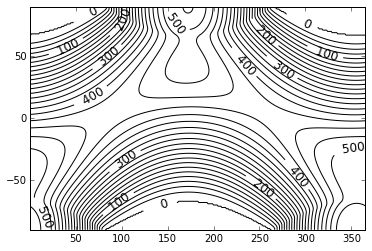

In [6]:
import matplotlib.pyplot as plt
lats = arange(-90.,91.)
days = arange(1.,366.)

Q = array([])
for lat in lats:
    for day in days:
        Q = append(Q, Qday_avg(lat,day))

Qn = reshape(Q,(181,365))
figure()
#CS=contourf(days, lats, Qn, range(0,550,50), cmap=plt.cm.RdBu_r)
CS=contour(days, lats, Qn, range(0,550,25), colors='k')
plt.clabel(CS, range(0,550,100) ,inline=1,fmt='%4.0f',fontsize=12)


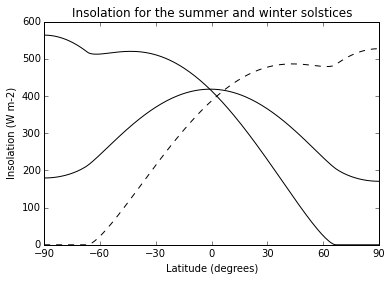

In [7]:
jun21 = 31+28+31+30+31+21
dec21 = 355
figure()
plot(lats,Qn[:,jun21],'k--',lats,Qn[:,dec21],'k')
plot(lats,Qn.mean(axis=1),'k')                      # Annual mean
axis([-90., 90., 0., 600])
xticks(arange(-90., 90.+1, 30.))
xlabel('Latitude (degrees)')
ylabel('Insolation (W m-2)')
title('Insolation for the summer and winter solstices')

<i>© Von P. Walden, Washington State University</i>